In [32]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import hashlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

def readData():
    dataPath = os.path.join(os.getcwd(), "train.csv")
    return pd.read_csv(dataPath)

def testSetCheck(identifier, testRatio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * testRatio

def splitData(data, testRatio, idCol, hash=hashlib.md5):
    ids = data[idCol]
    inTestSet = ids.apply(lambda id_: testSetCheck(id_, testRatio, hash))
    return data.loc[~inTestSet], data.loc[inTestSet]

housingData = readData()
dataTrain, dataTest = splitData(housingData, .20, 'Id')

In [3]:
dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [4]:
dataTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1179.000000,1179.000000,961.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1172.000000,1179.000000,...,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,726.960136,58.104326,69.359001,10533.826972,6.083969,5.573367,1971.068702,1984.990670,105.526451,440.479220,...,94.744699,45.905852,21.969466,3.703138,14.764207,2.053435,43.709924,6.289228,2007.801527,180568.316370
std,420.882514,43.102694,23.301268,10696.956087,1.384086,1.108848,30.298087,20.640197,184.229362,462.405264,...,124.622452,64.863423,59.966805,30.806920,54.572583,35.660177,536.598234,2.681505,1.320325,79922.586765
min,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,58.000000,7417.500000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130125.000000
50%,722.000000,50.000000,69.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,378.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162900.000000
75%,1088.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,167.250000,717.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213495.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,386.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dataTrain['Alley'].describe()

count       80
unique       2
top       Grvl
freq        45
Name: Alley, dtype: object

In [6]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1459
Data columns (total 81 columns):
Id               1179 non-null int64
MSSubClass       1179 non-null int64
MSZoning         1179 non-null object
LotFrontage      961 non-null float64
LotArea          1179 non-null int64
Street           1179 non-null object
Alley            80 non-null object
LotShape         1179 non-null object
LandContour      1179 non-null object
Utilities        1179 non-null object
LotConfig        1179 non-null object
LandSlope        1179 non-null object
Neighborhood     1179 non-null object
Condition1       1179 non-null object
Condition2       1179 non-null object
BldgType         1179 non-null object
HouseStyle       1179 non-null object
OverallQual      1179 non-null int64
OverallCond      1179 non-null int64
YearBuilt        1179 non-null int64
YearRemodAdd     1179 non-null int64
RoofStyle        1179 non-null object
RoofMatl         1179 non-null object
Exterior1st      1179 non-nu

In [7]:
dataTrain['Alley'].value_counts()

Grvl    45
Pave    35
Name: Alley, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e5b88128>,
      dtype=object)

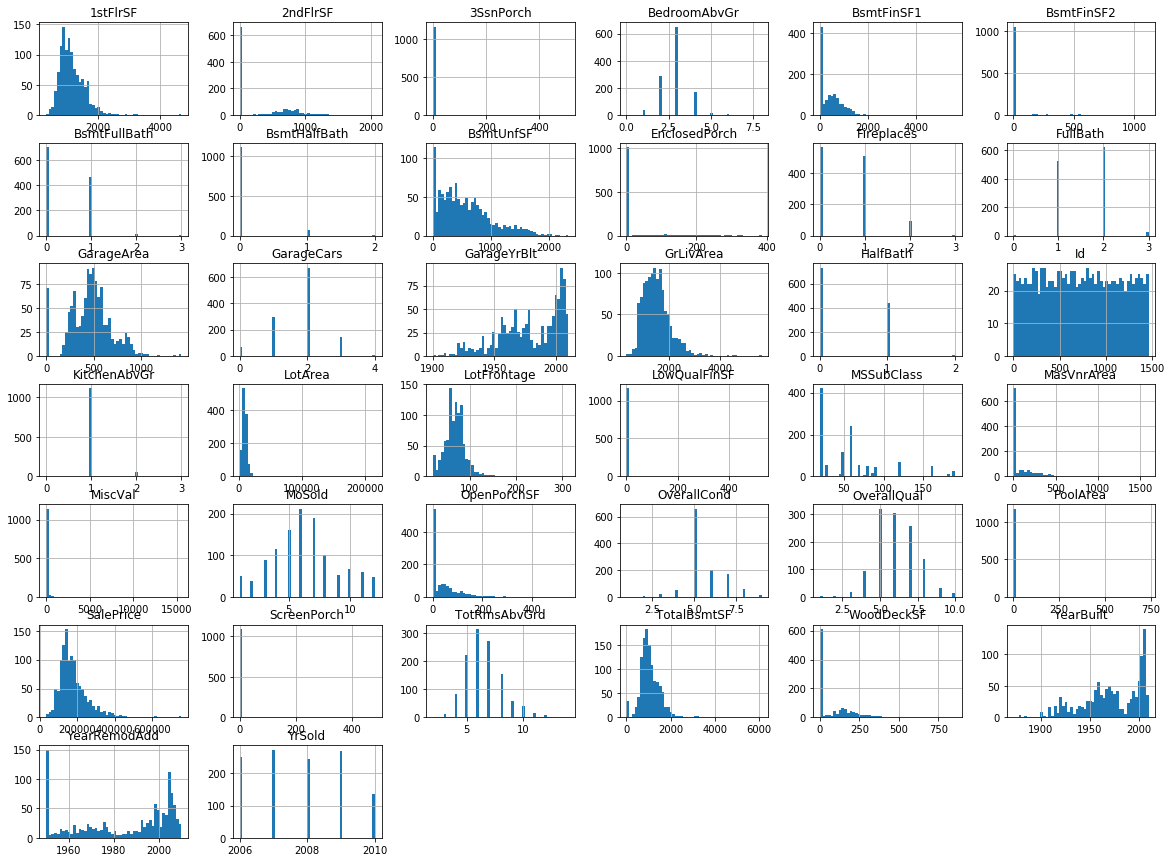

In [8]:
dataTrain.hist(bins=50, figsize=(20,15))

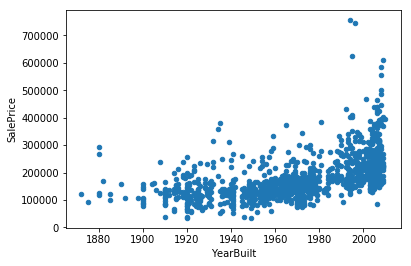

In [9]:
dataTrain.plot(kind="scatter", x="YearBuilt", y="SalePrice")

In [10]:
corrMatrix = dataTrain.corr()

In [11]:
corrMatrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.783971
GrLivArea        0.702090
GarageCars       0.638651
TotalBsmtSF      0.617705
GarageArea       0.614799
1stFlrSF         0.612494
FullBath         0.561970
YearBuilt        0.526432
TotRmsAbvGrd     0.522717
YearRemodAdd     0.497060
Fireplaces       0.483097
GarageYrBlt      0.481248
MasVnrArea       0.475586
BsmtFinSF1       0.401749
LotFrontage      0.374697
WoodDeckSF       0.318730
2ndFlrSF         0.305870
OpenPorchSF      0.303105
HalfBath         0.270705
LotArea          0.249049
BsmtFullBath     0.232294
BsmtUnfSF        0.220242
BedroomAbvGr     0.185894
PoolArea         0.111199
ScreenPorch      0.086395
3SsnPorch        0.044246
MoSold           0.031003
BsmtHalfBath    -0.006606
MiscVal         -0.012022
YrSold          -0.021519
BsmtFinSF2      -0.028403
Id              -0.028521
LowQualFinSF    -0.052392
OverallCond     -0.079830
MSSubClass      -0.104112
EnclosedPorch   -0.127390
KitchenAbvGr    -0.136064
Name: SalePr

In [12]:
dataTrain["OverallQual"].value_counts()

5     320
6     303
7     256
8     136
4      95
9      34
3      17
10     13
2       3
1       2
Name: OverallQual, dtype: int64

In [13]:
dataTrain["KitchenAbvGr"].value_counts()

1    1118
2      58
3       2
0       1
Name: KitchenAbvGr, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e36814a8>,
      dtype=object)

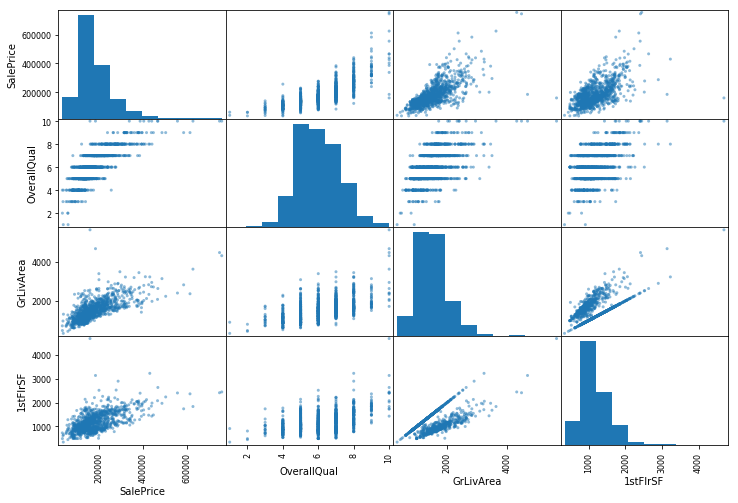

In [14]:
attributes = ["SalePrice", "OverallQual", "GrLivArea", "1stFlrSF"]
scatter_matrix(dataTrain[attributes], figsize=(12,8))

In [15]:
dataTrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
dataTrain.columns.to_series().groupby(dataTrain.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [39]:
#Create a data frame of just numeric types
numDf = dataTrain.select_dtypes(exclude='object')
catDf = dataTrain.select_dtypes(include='object')

In [33]:
imputer = SimpleImputer(strategy="median")

In [34]:
imputer.fit(numDf)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [35]:
imputer.statistics_

array([7.220e+02, 5.000e+01, 6.900e+01, 9.473e+03, 6.000e+00, 5.000e+00,
       1.972e+03, 1.994e+03, 0.000e+00, 3.780e+02, 0.000e+00, 4.740e+02,
       9.900e+02, 1.086e+03, 0.000e+00, 0.000e+00, 1.466e+03, 0.000e+00,
       0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 6.000e+00,
       1.000e+00, 1.979e+03, 2.000e+00, 4.780e+02, 0.000e+00, 2.400e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
       2.008e+03, 1.629e+05])

In [36]:
X = imputer.transform(numDf)

In [37]:
numTrainDf = pd.DataFrame(X, columns=numDf.columns)

In [40]:
catDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1179 non-null object
Street           1179 non-null object
Alley            80 non-null object
LotShape         1179 non-null object
LandContour      1179 non-null object
Utilities        1179 non-null object
LotConfig        1179 non-null object
LandSlope        1179 non-null object
Neighborhood     1179 non-null object
Condition1       1179 non-null object
Condition2       1179 non-null object
BldgType         1179 non-null object
HouseStyle       1179 non-null object
RoofStyle        1179 non-null object
RoofMatl         1179 non-null object
Exterior1st      1179 non-null object
Exterior2nd      1179 non-null object
MasVnrType       1172 non-null object
ExterQual        1179 non-null object
ExterCond        1179 non-null object
Foundation       1179 non-null object
BsmtQual         1147 non-null object
BsmtCond         1147 non-null object
BsmtExposure     1146

In [41]:
catDf['MiscFeature'].value_counts()

Shed    36
Gar2     2
Othr     1
Name: MiscFeature, dtype: int64

In [53]:
catDf.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
for i in catDf.columns:
    print(catDf[i].value_counts())

RL         924
RM         182
FV          51
RH          14
C (all)      8
Name: MSZoning, dtype: int64
Pave    1174
Grvl       5
Name: Street, dtype: int64
Grvl    45
Pave    35
Name: Alley, dtype: int64
Reg    743
IR1    399
IR2     28
IR3      9
Name: LotShape, dtype: int64
Lvl    1049
Bnk      57
HLS      43
Low      30
Name: LandContour, dtype: int64
AllPub    1178
NoSeWa       1
Name: Utilities, dtype: int64
Inside     851
Corner     204
CulDSac     82
FR2         38
FR3          4
Name: LotConfig, dtype: int64
Gtl    1116
Mod      52
Sev      11
Name: LandSlope, dtype: int64
NAmes      187
CollgCr    125
OldTown     99
Edwards     83
Somerst     68
Gilbert     65
NWAmes      59
NridgHt     58
Sawyer      54
Crawfor     48
BrkSide     46
SawyerW     40
Mitchel     37
Timber      34
NoRidge     31
IDOTRR      28
StoneBr     22
ClearCr     21
SWISU       16
MeadowV     16
BrDale      13
Blmngtn     12
Veenker      9
NPkVill      8
Name: Neighborhood, dtype: int64
Norm      1017
Fee